* [reference 1](https://www.kaggle.com/muonneutrino/wikipedia-traffic-data-exploration#Making-Predictions)
* [reference 2](https://www.kaggle.com/headsortails/wiki-traffic-forecast-exploration-wtf-eda)
* [reference 3](https://www.kaggle.com/zoupet/predictive-analysis-with-different-approaches)

# Data Description & Properties

data source: https://www.kaggle.com/c/web-traffic-time-series-forecasting
train_2.csv.zip

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='dark')

train = pd.read_csv('train_2.csv', index_col=0)
print(f'{train.shape[0]} time series (rows): daily views of each web page')
print(f'{train.shape[1]} days (columns): from {train.columns.min()} to {train.columns.max()}')
train.head(1)

145063 time series (rows): daily views of each web page
803 days (columns): from 2015-07-01 to 2017-09-10


,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
Page,,,,,,,,,,,,,,,,,,,,,
2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0


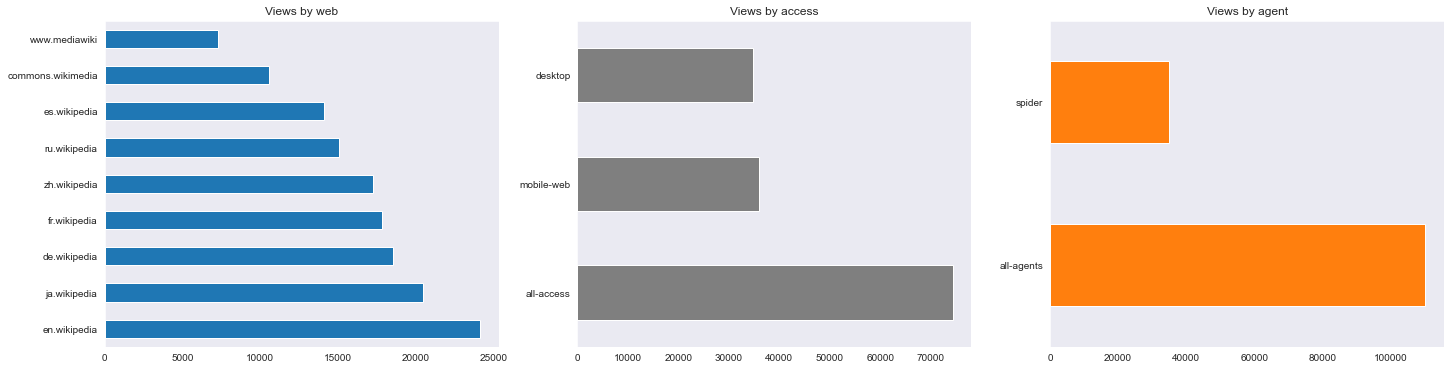

In [ ]:
page_details = train.index.str.extract(r'(?P<topic>.*)\_(?P<web>.*).org\_(?P<access>.*)\_(?P<agent>.*)')
plt.figure(figsize=(24,6))
j = 1
c = ['tab:blue', 'tab:grey', 'tab:orange']
for i in page_details.columns[1:]: 
    plt.subplot(1,3,j)
    page_details[i].value_counts().plot(kind='barh', color=c[j-1])
    plt.title('Views by '+i)
    j+=1

# Data Preprocessing & EDA
* en.wikipedia: more views (US-based site), large spikes in Aug 2016 (olympics) & Nov 2016 (election)
* es.wikipedia: weekly seasonality, 6-month dip

In [ ]:
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

en = train.iloc[page_details[page_details['web'] == 'en.wikipedia'].index, :].sum()
en.index = pd.to_datetime(en.index)
en_dif = (en - en.shift(1)).iloc[1:,]

es = train.iloc[page_details[page_details['web'] == 'es.wikipedia'].index, :].sum()
es.index = pd.to_datetime(es.index)
es_dif = (es - es.shift(1)).iloc[1:,]

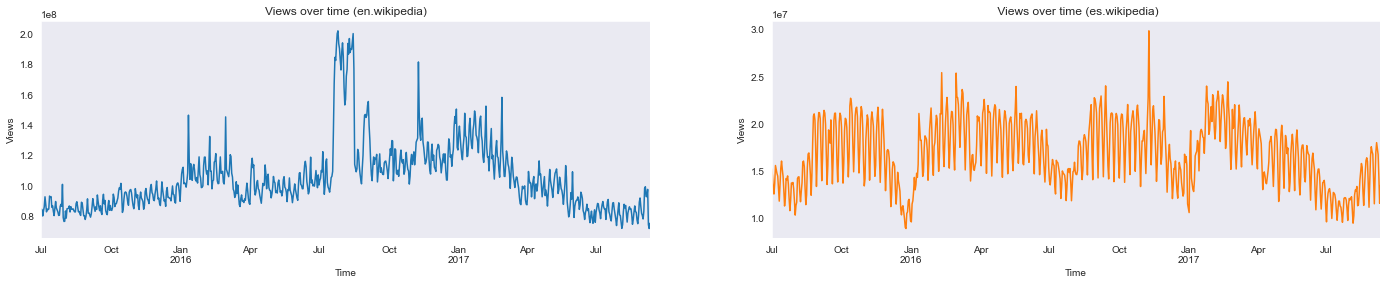

In [ ]:
plt.figure(figsize=(24,4))
plt.subplot(121)
en.plot(title='Views over time (en.wikipedia)', xlabel='Time', ylabel='Views')
plt.subplot(122)
es.plot(title=' Views over time (es.wikipedia)', xlabel='Time', ylabel='Views', color='#ff7f0e')

* ACF: large spikes every 7 days due to weekly seasonality
* PACF: the first week has the largest spike

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To su

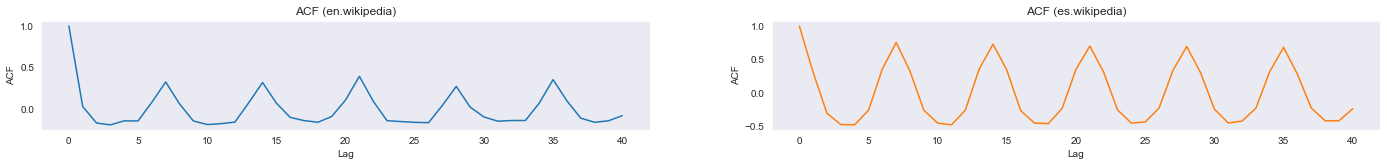

In [ ]:
plt.figure(figsize=(24,2))
plt.subplot(121)
pd.Series(acf(en_dif)).plot(title='ACF (en.wikipedia)', xlabel='Lag', ylabel='ACF')
plt.subplot(122)
pd.Series(acf(es_dif)).plot(title='ACF (es.wikipedia)', xlabel='Lag', ylabel='ACF', color='#ff7f0e')

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


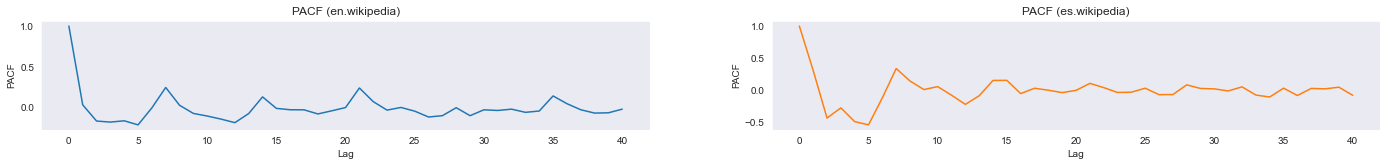

In [ ]:
plt.figure(figsize=(24,2))
plt.subplot(121)
pd.Series(pacf(en_dif)).plot(title='PACF (en.wikipedia)', xlabel='Lag', ylabel='PACF')
plt.subplot(122)
pd.Series(pacf(es_dif)).plot(title='PACF (es.wikipedia)', xlabel='Lag', ylabel='PACF', color='#ff7f0e')

* es.wikipedia (all-agents vs spider): spider is approximately constant
* es.wikipedia (all-access vs desktop vs mobile-web): three groups have similar trends

Text(0.5, 0, 'Time')

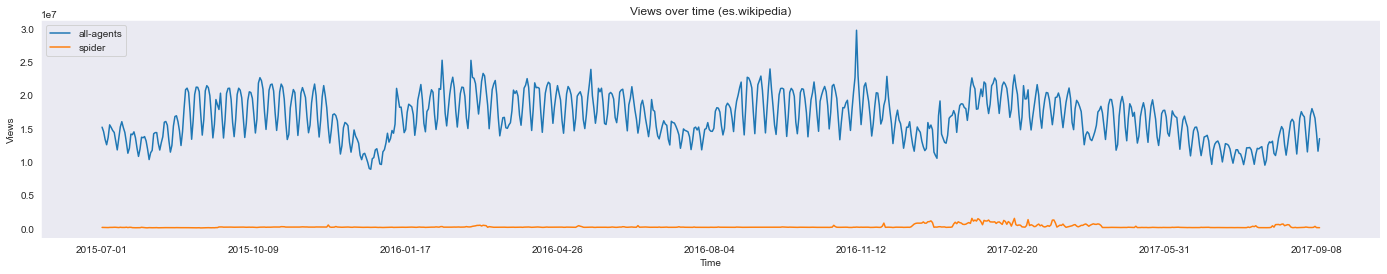

In [ ]:
for i in np.unique(page_details['agent']): train.iloc[page_details[(page_details['agent'] == i) & (page_details['web'] == 'es.wikipedia')].index, :].sum().plot(label=i, figsize=(24,4))
plt.legend(loc='upper left')
plt.title('Views over time (es.wikipedia)')
plt.ylabel('Views')
plt.xlabel('Time')

Text(0.5, 0, 'Time')

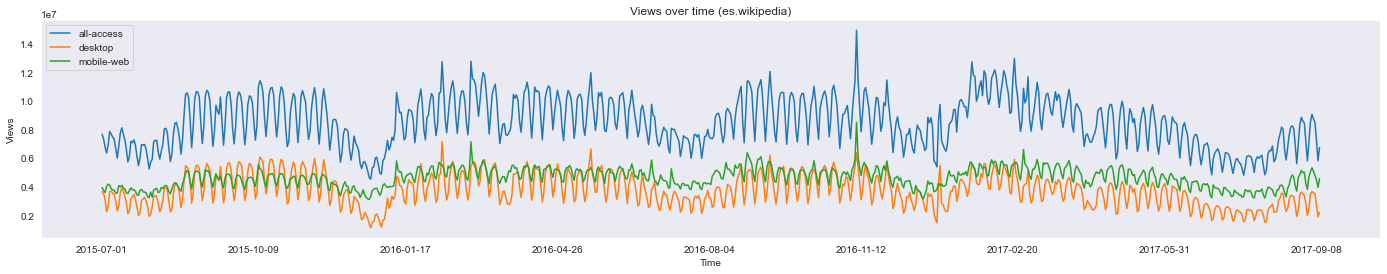

In [ ]:
for i in np.unique(page_details['access']): train.iloc[page_details[(page_details['access'] == i) & (page_details['web'] == 'es.wikipedia')].index, :].sum().plot(label=i, figsize=(24,4))
plt.legend(loc='upper left')
plt.title('Views over time (es.wikipedia)')
plt.ylabel('Views')
plt.xlabel('Time')

# Feature Engineering
* missing values

9.3% web pages (329 out of 3537) have one or more missing value


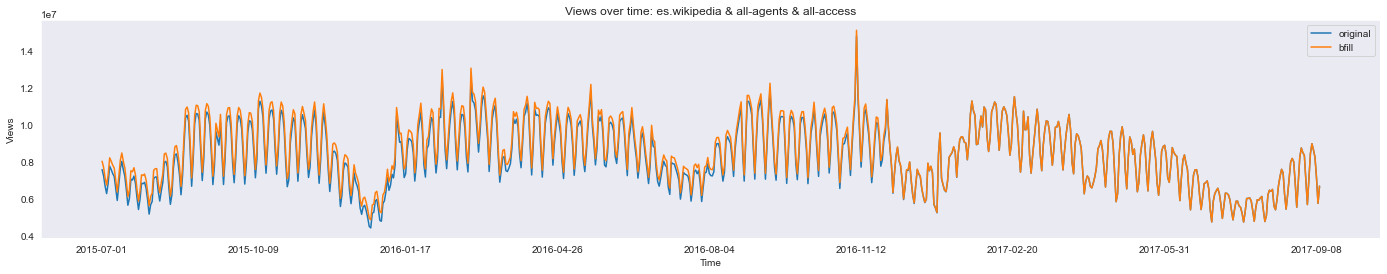

In [ ]:
df = (page_details['access'] == 'all-access') & (page_details['agent'] == 'all-agents') & (page_details['web'] == 'es.wikipedia')
df = train.iloc[df[df].index,:]

na_num = sum(df.isna().sum(axis=1) != 0)
num = df.shape[0]
print(f'{round(na_num/num*100, 1)}% web pages ({na_num} out of {num}) have one or more missing value')

original = df.sum()
bfill = df.T.fillna(method='bfill').T.sum()
original.plot(figsize=(24,4), title='Views over time: es.wikipedia & all-agents & all-access', ylabel='Views', xlabel='Time', label='original')
bfill.plot(label='bfill')
plt.legend()

In [ ]:
df = bfill.to_frame('Views').reset_index().rename(columns={'index': 'Date'})
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Views
0,2015-07-01,8022174.0
1,2015-07-02,7687790.0
2,2015-07-03,7121842.0
3,2015-07-04,6720181.0
4,2015-07-05,7275102.0
...,...,...
798,2017-09-06,8638762.0
799,2017-09-07,8234557.0
800,2017-09-08,7135816.0
801,2017-09-09,5737143.0


In [ ]:
y = df.set_index('Date')
y

,Views
Date,
2015-07-01,8022174.0
2015-07-02,7687790.0
2015-07-03,7121842.0
2015-07-04,6720181.0
2015-07-05,7275102.0
...,...
2017-09-06,8638762.0
2017-09-07,8234557.0
2017-09-08,7135816.0


### ML model

In [ ]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.dayofweek
df['Dif'] = df['Views'] - df['Views'].shift(1)
for i in range(1, 8): df['Dif Lag ' + str(i)] = df['Dif'].shift(i)
df.dropna(inplace = True)
df

,Date,Views,Month,Day,Weekday,Dif,Dif Lag 1,Dif Lag 2,Dif Lag 3,Dif Lag 4,Dif Lag 5,Dif Lag 6,Dif Lag 7
8,2015-07-09,7648772.0,7,9,3,-157965.0,-216611.0,-184575.0,932821.0,554921.0,-401661.0,-565948.0,-334384.0
9,2015-07-10,7001292.0,7,10,4,-647480.0,-157965.0,-216611.0,-184575.0,932821.0,554921.0,-401661.0,-565948.0
10,2015-07-11,6349850.0,7,11,5,-651442.0,-647480.0,-157965.0,-216611.0,-184575.0,932821.0,554921.0,-401661.0
11,2015-07-12,7175997.0,7,12,6,826147.0,-651442.0,-647480.0,-157965.0,-216611.0,-184575.0,932821.0,554921.0
12,2015-07-13,8065523.0,7,13,0,889526.0,826147.0,-651442.0,-647480.0,-157965.0,-216611.0,-184575.0,932821.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,2017-09-06,8638762.0,9,6,2,-332513.0,535312.0,1423788.0,1338587.0,-1298769.0,-1367293.0,-150798.0,-246667.0
799,2017-09-07,8234557.0,9,7,3,-404205.0,-332513.0,535312.0,1423788.0,1338587.0,-1298769.0,-1367293.0,-150798.0
800,2017-09-08,7135816.0,9,8,4,-1098741.0,-404205.0,-332513.0,535312.0,1423788.0,1338587.0,-1298769.0,-1367293.0
801,2017-09-09,5737143.0,9,9,5,-1398673.0,-1098741.0,-404205.0,-332513.0,535312.0,1423788.0,1338587.0,-1298769.0


SMAPE: 5.02
MAPE: 0.05
MAE: 322307.12


Text(0.5, 0, 'Time')

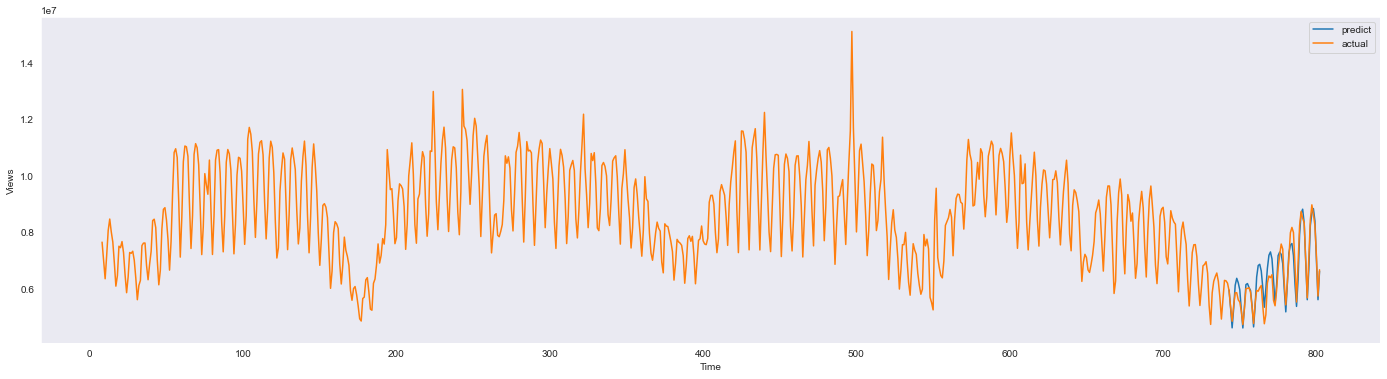

In [ ]:
X = df[['Month'] + ['Day'] + ['Weekday'] + ['Dif Lag %d' % i for i in range(1, 8)]]
y = df['Dif']
X_train, y_train, X_test, y_test = X[:-60], y[:-60], X[-60:], y[-60:]

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(random_state=40)
model.fit(X_train, y_train)

actual = df.iloc[-60:]['Views']
predict = pd.Series(df.iloc[-61]['Views'] + model.predict(X_test).cumsum(), index=actual.index)
residual = predict - actual

def smape(a, f): return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)
print('SMAPE: %.2f' %smape(actual, predict))
print('MAPE: %.2f' %np.mean(np.abs(residual)/np.abs(actual)))
print('MAE: %.2f' %np.mean(np.abs(residual)))

plt.figure(figsize=(24,6))
plt.plot(predict, label='predict')
plt.plot(df['Views'], label='actual')
plt.legend()
plt.ylabel('Views')
plt.xlabel('Time')